# HR Analysis & creating Model

Importing all required library

In [339]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import joblib
import warnings
warnings.filterwarnings("ignore")


Load the Data

In [340]:
#uploading dataset
ds=pd.read_csv("hr_analytics.csv")
ds

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

Observations: Data set related to HR Analytics

In [341]:
#changing Dataset in Dataframe
ds=pd.DataFrame(data=ds)

# Dataset basic details analysis (Null Value,data type, shape etc )

In [342]:
# top 5 rows of dataset
ds.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [343]:
#name of column index
ds.keys()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [344]:
ds.Attrition

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [345]:
ds.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

so as per dataset there are 1233 employees are with no Attrition and remain are yes Attrition (237).

In [346]:
ds.shape

(1470, 35)

there is 1470 rows and 35 cloumns available in original dataset

In [347]:
ds.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

there are objects and int values are present in data set.

In [348]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Observations: 

There are 9 object data and 26 int data in the given dataset.

We have to convert object columns in int value or drop in case they are not providing any proper informations.


In [349]:
ds.isnull()
#reverifing the null value again

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
1465  False      False           False      False       False   
1466  False      False           False      False       False   
1467  False      False           False      False       False   
1468  False      False           False      False       False   
1469  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0                False      False           False          False   
1                False      False           False          False   
2                False      False           False          False   
3                False      False           False          False   
4                False      False           False          False   
...                ...        ...             ...            ...   
1465             False      False           False          False   
1466             False      False           False          False   
1467             False      False           False          False   
1468             False      False           False          False   
1469             False      False           False          False   

      EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
0              False  ...                     False          False   
1              False  ...                     False          False   
2              False  ...                     False          False   
3              False  ...                     False          False   
4              False  ...                     False          False   
...              ...  ...                       ...            ...   
1465           False  ...                     False          False   
1466           False  ...                     False          False   
1467           False  ...                     False          False   
1468           False  ...                     False          False   
1469           False  ...                     False          False   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                False              False                  False   
1                False              False                  False   
2                False              False                  False   
3                False              False                  False   
4                False              False                  False   
...                ...                ...                    ...   
1465             False              False                  False   
1466             False              False                  False   
1467             False              False                  False   
1468             False              False                  False   
1469             False              False                  False   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0               False           False               False   
1               False           False               False   
2               False           False               False   
3               False           False               False   
4               False           False               False   
...               ...             ...                 ...   
1465            False           False               False   
1466            False           False               False   
1467            False           False               False   
1468            False           False               False   
1469            False           False               False   

      YearsSinceLas

In [350]:
# checking null value again in dataset
ds.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Observations: there is no null value in dataset.

# Stastical analysis of dataset

In [351]:
ds.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [352]:
#checking number of unique values in dataset
ds.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

observations: 

    1. EmployeeCount having same value
    2. Over18 having same value
    3. StandardHours having same value
    4. all EmployeeNumber values are unique
    
so we can drop all above.

In [353]:
drop_cloumns=['EmployeeCount','Over18','StandardHours', "EmployeeNumber"]

for i in ds[drop_cloumns]:
    ds.drop(i, axis=1, inplace=True)

In [354]:
ds.shape

(1470, 31)

Observations: now there are 1470 rows are 31 columns available

In [355]:
#checking dataset type again for further mathmatical oprations
ds.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

Observations: 
    8 columns are object type so we can change them by lable encoder technique.

In [356]:
LE=LabelEncoder()

labelencoder_cloumns=['Attrition','BusinessTravel','Department','EducationField', "Gender", "JobRole", "MaritalStatus", "OverTime" ]

for i in ds[labelencoder_cloumns]:
    ds[i]=LE.fit_transform(ds[i])

In [357]:
ds.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

Observations: now all coulmns are integer type.

In [358]:
ds.keys()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:>

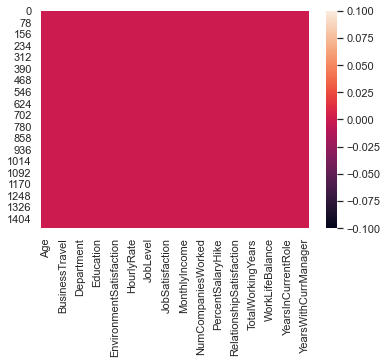

In [359]:
#once again checking null value through heat map
sns.heatmap(ds.isnull())


Observations: no null values are present

# Identifing the target & Independent features
As per the project we are trying to understanding the Attrition in HR so Attrition is target (or output) and other variables are independent features.

Now Observing the target cloumn (attrition)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

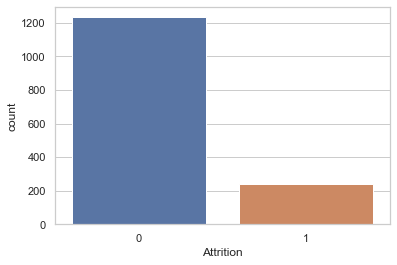

In [360]:
#By using count plot we can see the graph of yes Attrition and No Attrition
sns.countplot(x=ds["Attrition"])

0---> No Attrition
1---> Yes Attrition

Observations: 

we can see ratio of Yes Attrition is very less than No Attrition (class imbalance problem)
so for the better model we have to resolve load balance probelem (we can use here oversampling in minority class)

# EDA 

# EDA using Data Visualisations

# (i) Univariate Analysis

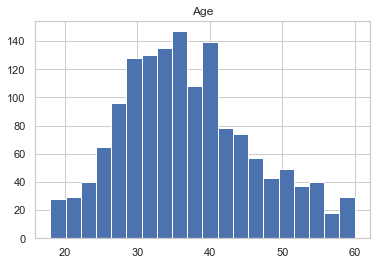

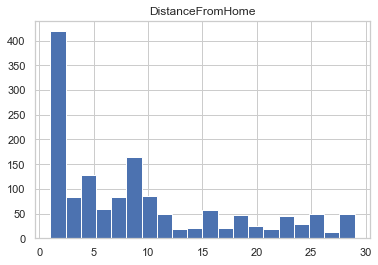

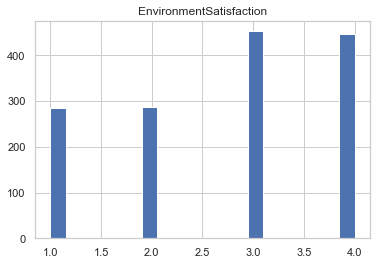

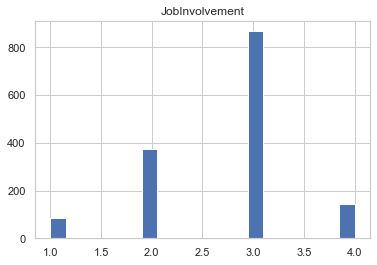

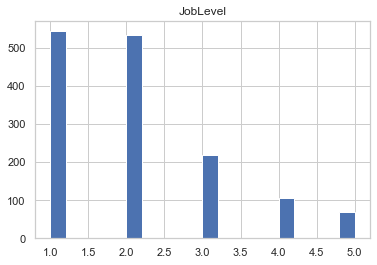

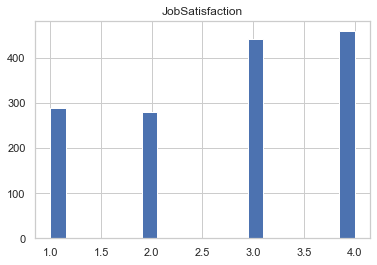

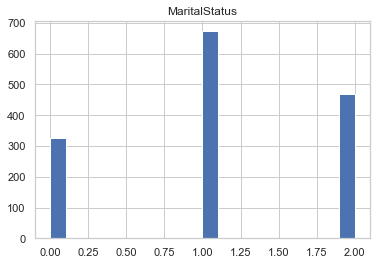

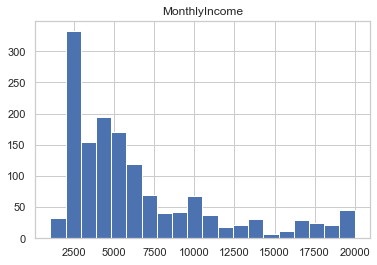

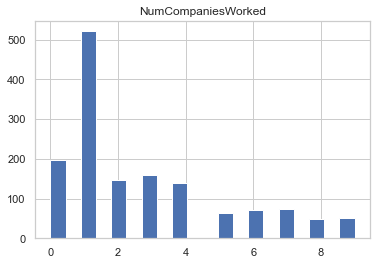

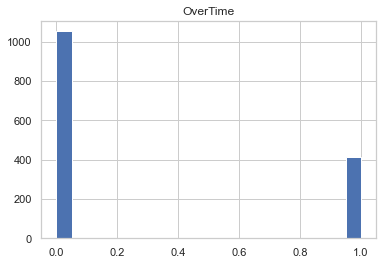

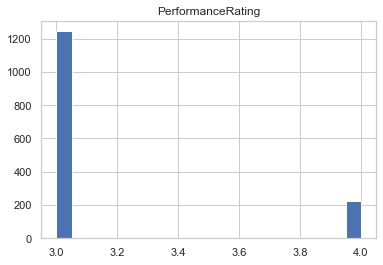

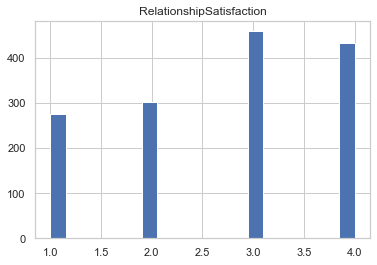

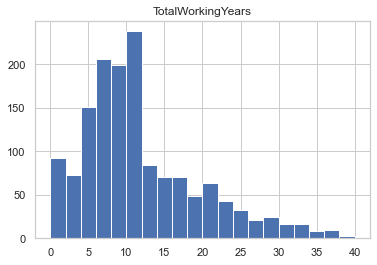

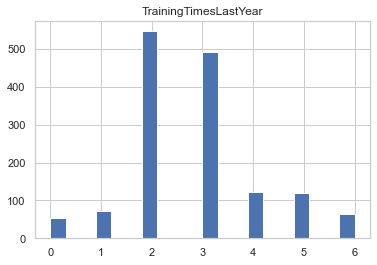

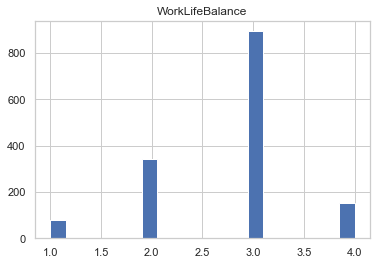

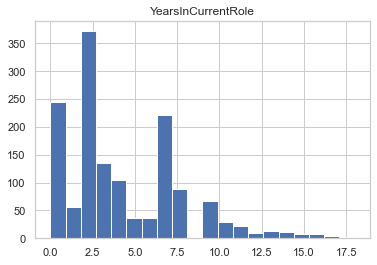

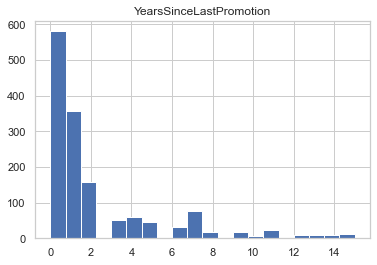

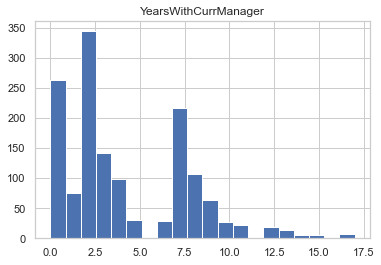

In [361]:
columns=['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime','PerformanceRating', 'RelationshipSatisfaction','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for i in ds[columns]:
    plt.figure()
    plt.title(i)
    ds[i].hist(bins=20)


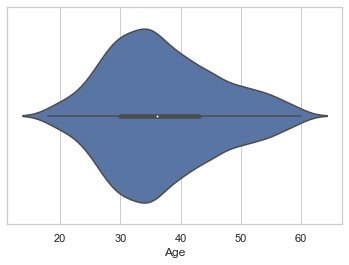

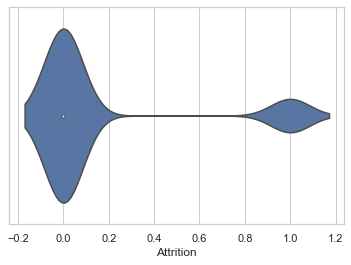

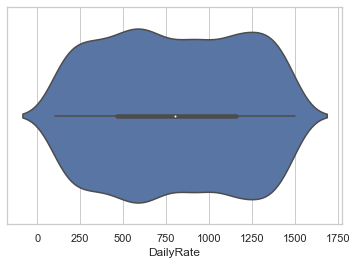

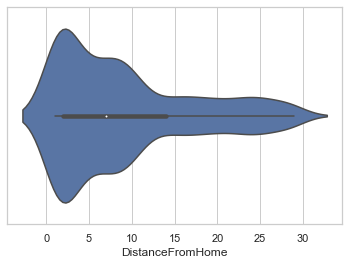

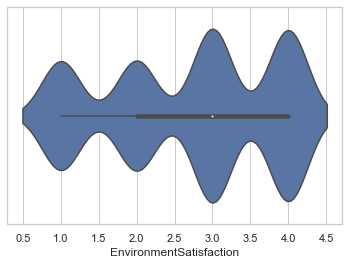

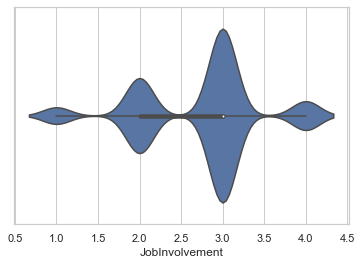

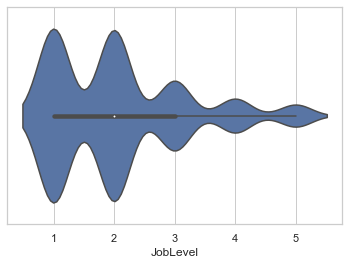

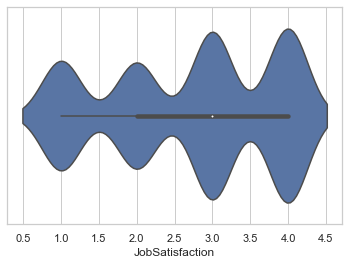

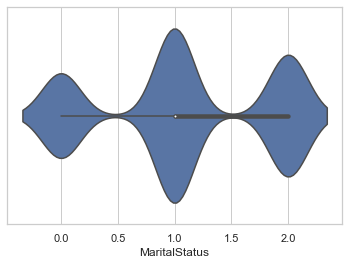

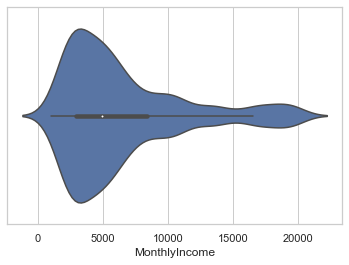

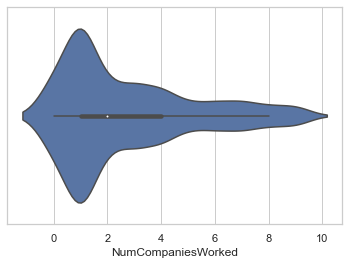

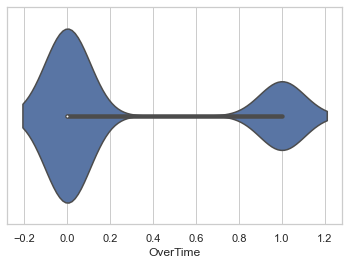

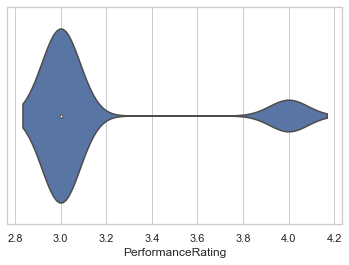

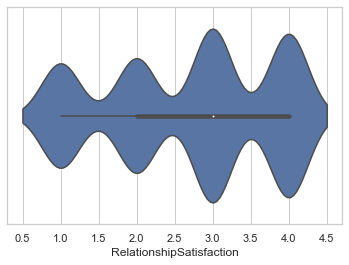

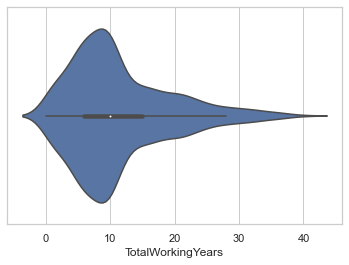

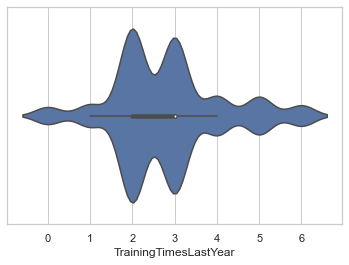

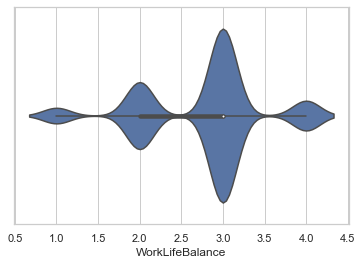

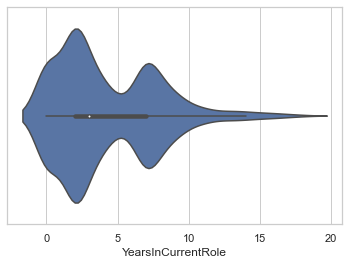

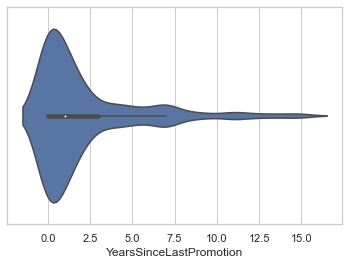

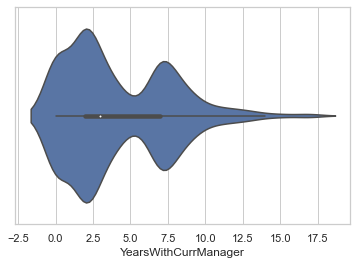

In [362]:
#using the below code creating violinplot.

columns1=['Age', "Attrition", 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime','PerformanceRating', 'RelationshipSatisfaction','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for i in ds[columns1]:
    plt.figure()
    sns.violinplot(ds[i], data=ds)

Observation: by violinplot we can see most of the cloumn values density is on sided

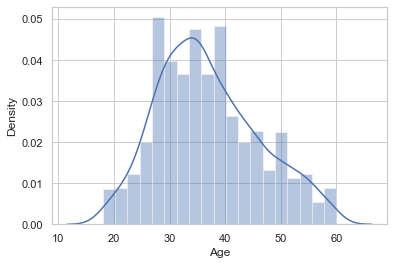

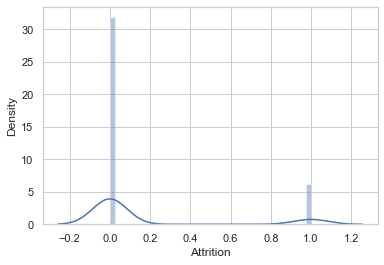

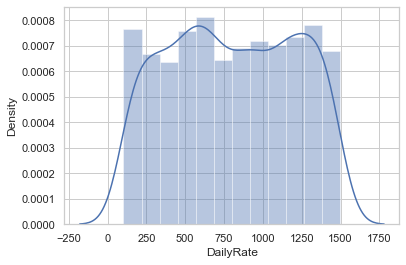

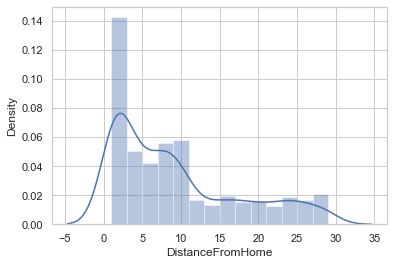

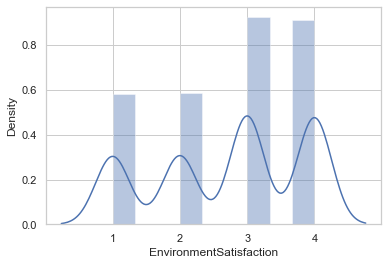

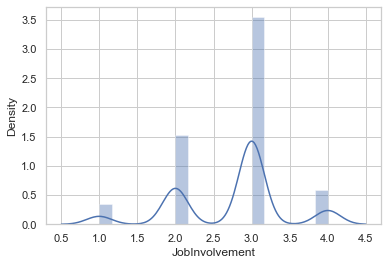

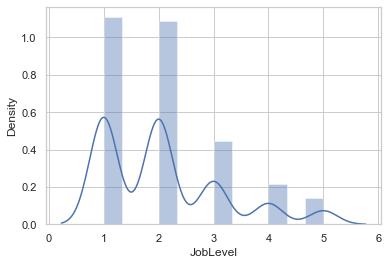

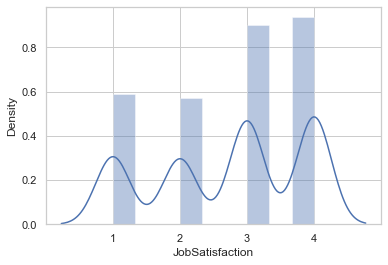

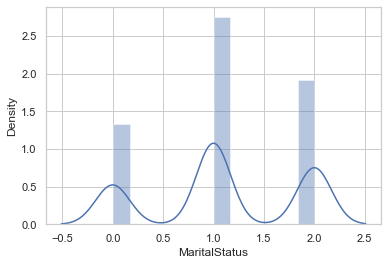

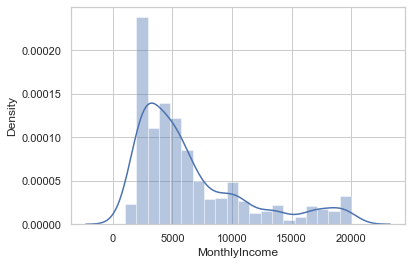

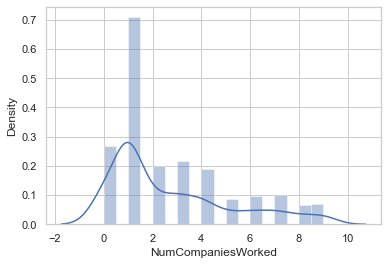

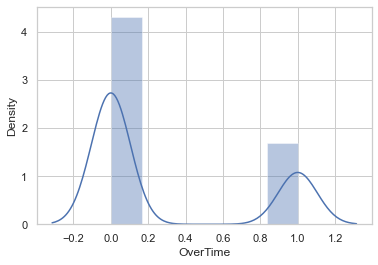

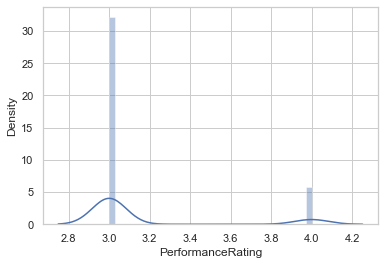

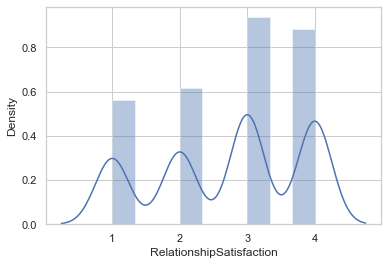

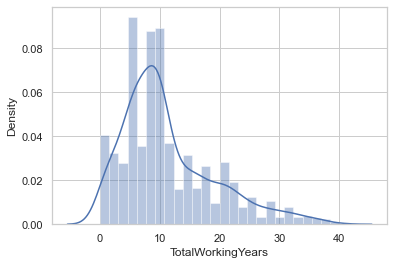

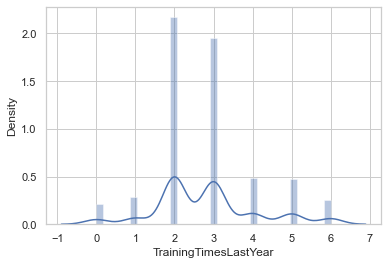

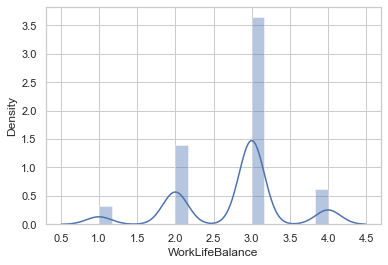

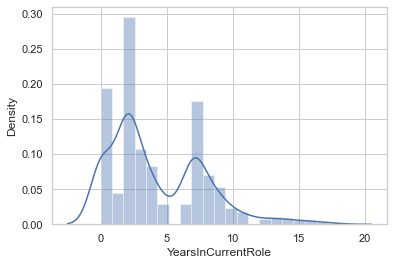

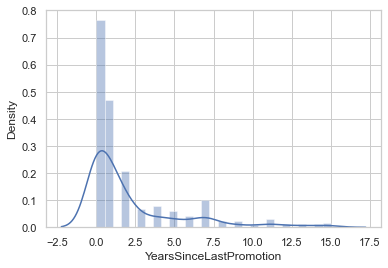

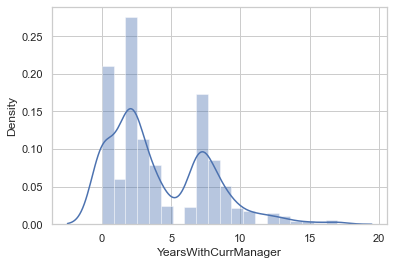

In [363]:
for i in ds[columns1]:
    plt.figure()
    sns.distplot(ds[i],kde=True)

Observations: most of the parameters (coulmns) having skewness (+ve skewness)

# (ii) Bivariate Analysis

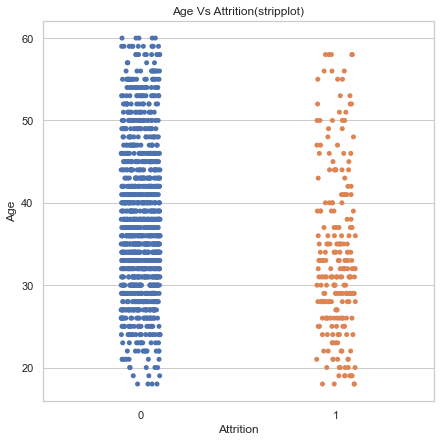

In [364]:
#stripplot between Age and Attrition.

plt.figure(figsize=[7,7])
sns.set(style="whitegrid")
ax=sns.stripplot(y="Age",x="Attrition",data=ds) 
plt.title("Age Vs Attrition(stripplot)")
plt.show()

Observations:
    between the age of 25- 35 more number of yes Attrition

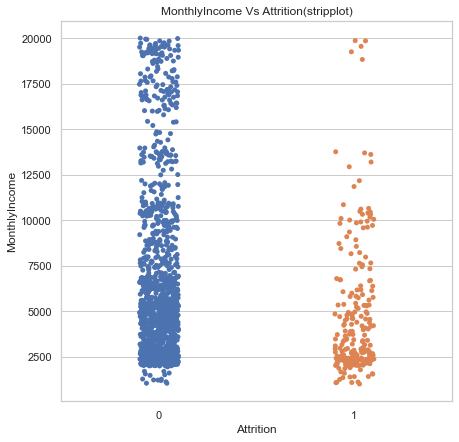

In [365]:
#stripplot between MonthlyIncome and Attrition.

plt.figure(figsize=[7,7])
sns.set(style="whitegrid")
ax=sns.stripplot(y="MonthlyIncome",x="Attrition",data=ds)
plt.title("MonthlyIncome Vs Attrition(stripplot)")
plt.show()

Observations: high level of salary having low yes Attrition

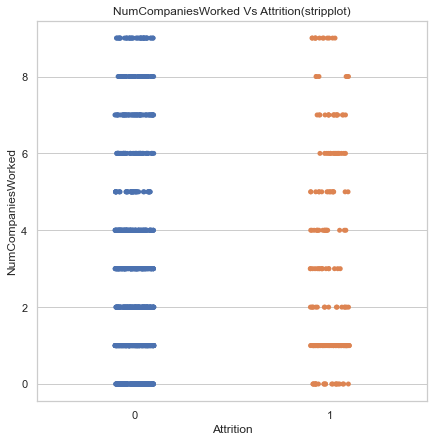

In [366]:
plt.figure(figsize=[7,7])
sns.set(style="whitegrid")
ax=sns.stripplot(y="NumCompaniesWorked",x="Attrition",data=ds)
plt.title("NumCompaniesWorked Vs Attrition(stripplot)")
plt.show()

observations: more number of companies worked having less yes attrition

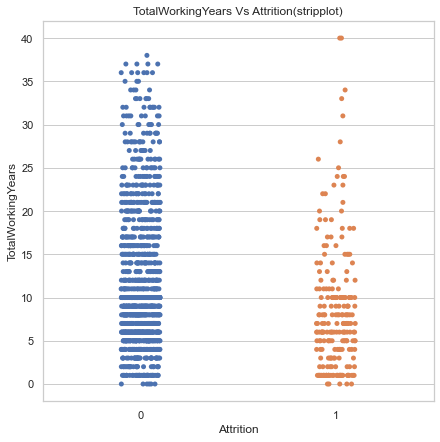

In [367]:

plt.figure(figsize=[7,7])
sns.set(style="whitegrid")
ax=sns.stripplot(y="TotalWorkingYears",x="Attrition",data=ds)
plt.title("TotalWorkingYears Vs Attrition(stripplot)")
plt.show()

Observations: More years of experience having less yes Attrition.

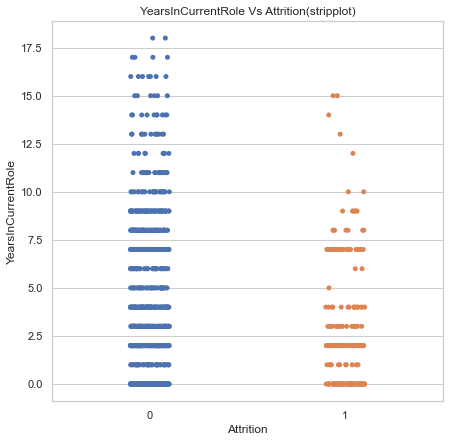

In [368]:
plt.figure(figsize=[7,7])
sns.set(style="whitegrid")
ax=sns.stripplot(y="YearsInCurrentRole",x="Attrition",data=ds)
plt.title("YearsInCurrentRole Vs Attrition(stripplot)")
plt.show()

Observations: 

    1. more number of employees having less than 10 years of experience in current role
    2. more years of experience in current role having less yes attrition

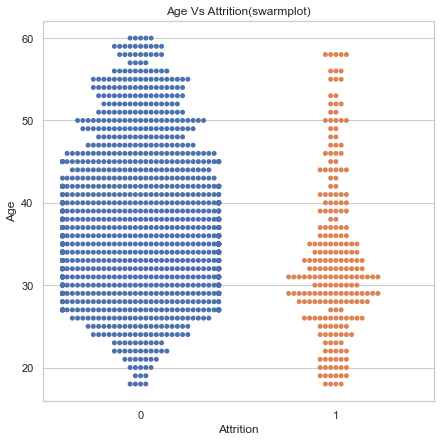

In [369]:


#swarmplot between Age and Attrition.

plt.figure(figsize=[7,7])
sns.set(style="whitegrid")
ax=sns.swarmplot(y="Age",x="Attrition",data=ds) 
plt.title("Age Vs Attrition(swarmplot)")
plt.show()

Observations: 
    
    1. High density for NO attrition from age 27 to 47 age range 
    2. in age range between 18 to 21 we can observe ration of yes Attrition is higher than NO attrition
    3. high yes attrition is between age 27 to 35. 

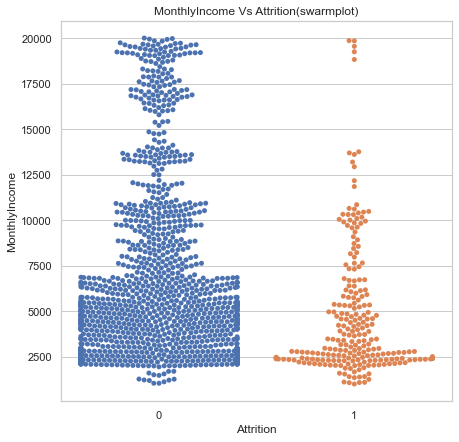

In [370]:
#swarmplot between MonthlyIncome and Attrition.

plt.figure(figsize=[7,7])
sns.set(style="whitegrid")
ax=sns.swarmplot(y="MonthlyIncome",x="Attrition",data=ds)
plt.title("MonthlyIncome Vs Attrition(swarmplot)")
plt.show()

Obervations: 
    
    1. more number of employees get monthly income in between 2500 - 7500 range
    2. higher the salary having less Yes attrition
    3. lower the salary having high density of yes attrition

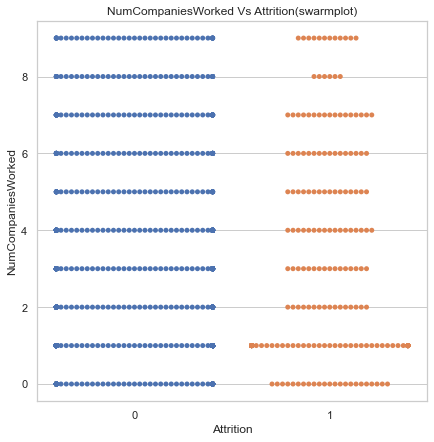

In [371]:
plt.figure(figsize=[7,7])
sns.set(style="whitegrid")
ax=sns.swarmplot(y="NumCompaniesWorked",x="Attrition",data=ds)
plt.title("NumCompaniesWorked Vs Attrition(swarmplot)")
plt.show()

observations:

    1. almost similar density for number of companies employee worked
    2. high density of yes attrition who dont have any other company previous experience or once 1 company experience.

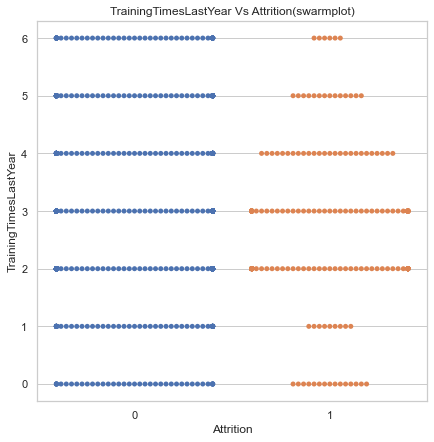

In [372]:

plt.figure(figsize=[7,7])
sns.set(style="whitegrid")
ax=sns.swarmplot(y="TrainingTimesLastYear",x="Attrition",data=ds) 
plt.title("TrainingTimesLastYear Vs Attrition(swarmplot)")
plt.show()

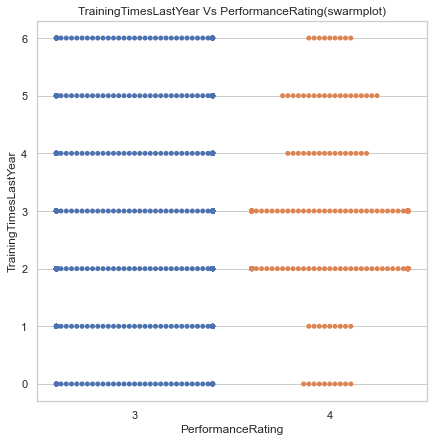

In [373]:
plt.figure(figsize=[7,7])
sns.set(style="whitegrid")
ax=sns.swarmplot(y="TrainingTimesLastYear",x="PerformanceRating",data=ds) 
plt.title("TrainingTimesLastYear Vs PerformanceRating(swarmplot)")
plt.show()

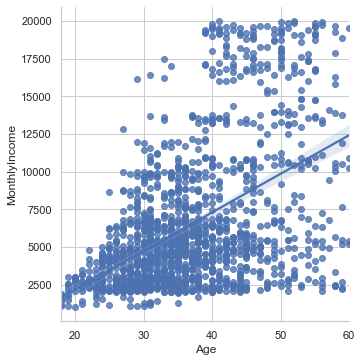

In [374]:
sns.lmplot(y="MonthlyIncome",x="Age",data=ds)

obervation: there is linear relation between monthly incore and age

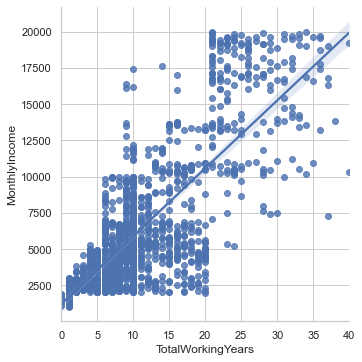

In [375]:
sns.lmplot(y="MonthlyIncome",x="TotalWorkingYears",data=ds)

observations: there is linear relation between total working years and monthly come

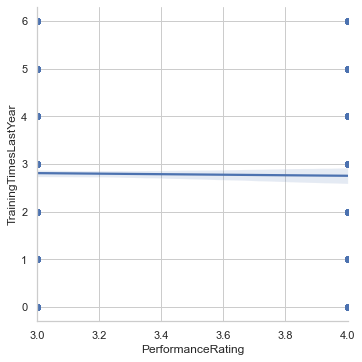

In [376]:
 sns.lmplot(y="TrainingTimesLastYear",x="PerformanceRating",data=ds)

observation: there is no any direct relation between performance rating and training times last year

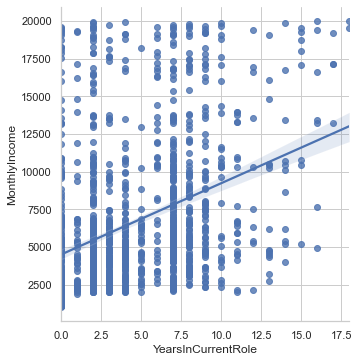

In [377]:
sns.lmplot(y="MonthlyIncome",x="YearsInCurrentRole",data=ds)

observation: there is a kind of linear relation between monthly income and year in current role

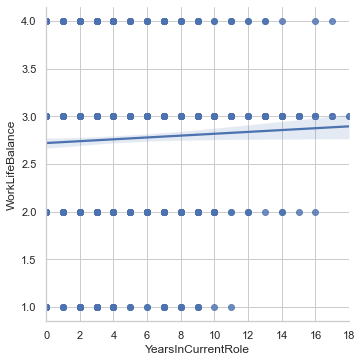

In [378]:
sns.lmplot(y="WorkLifeBalance",x="YearsInCurrentRole",data=ds)

observations: no such direct relation between YearsInCurrentRole and work life balance

# (iii) Multivariate Analysis

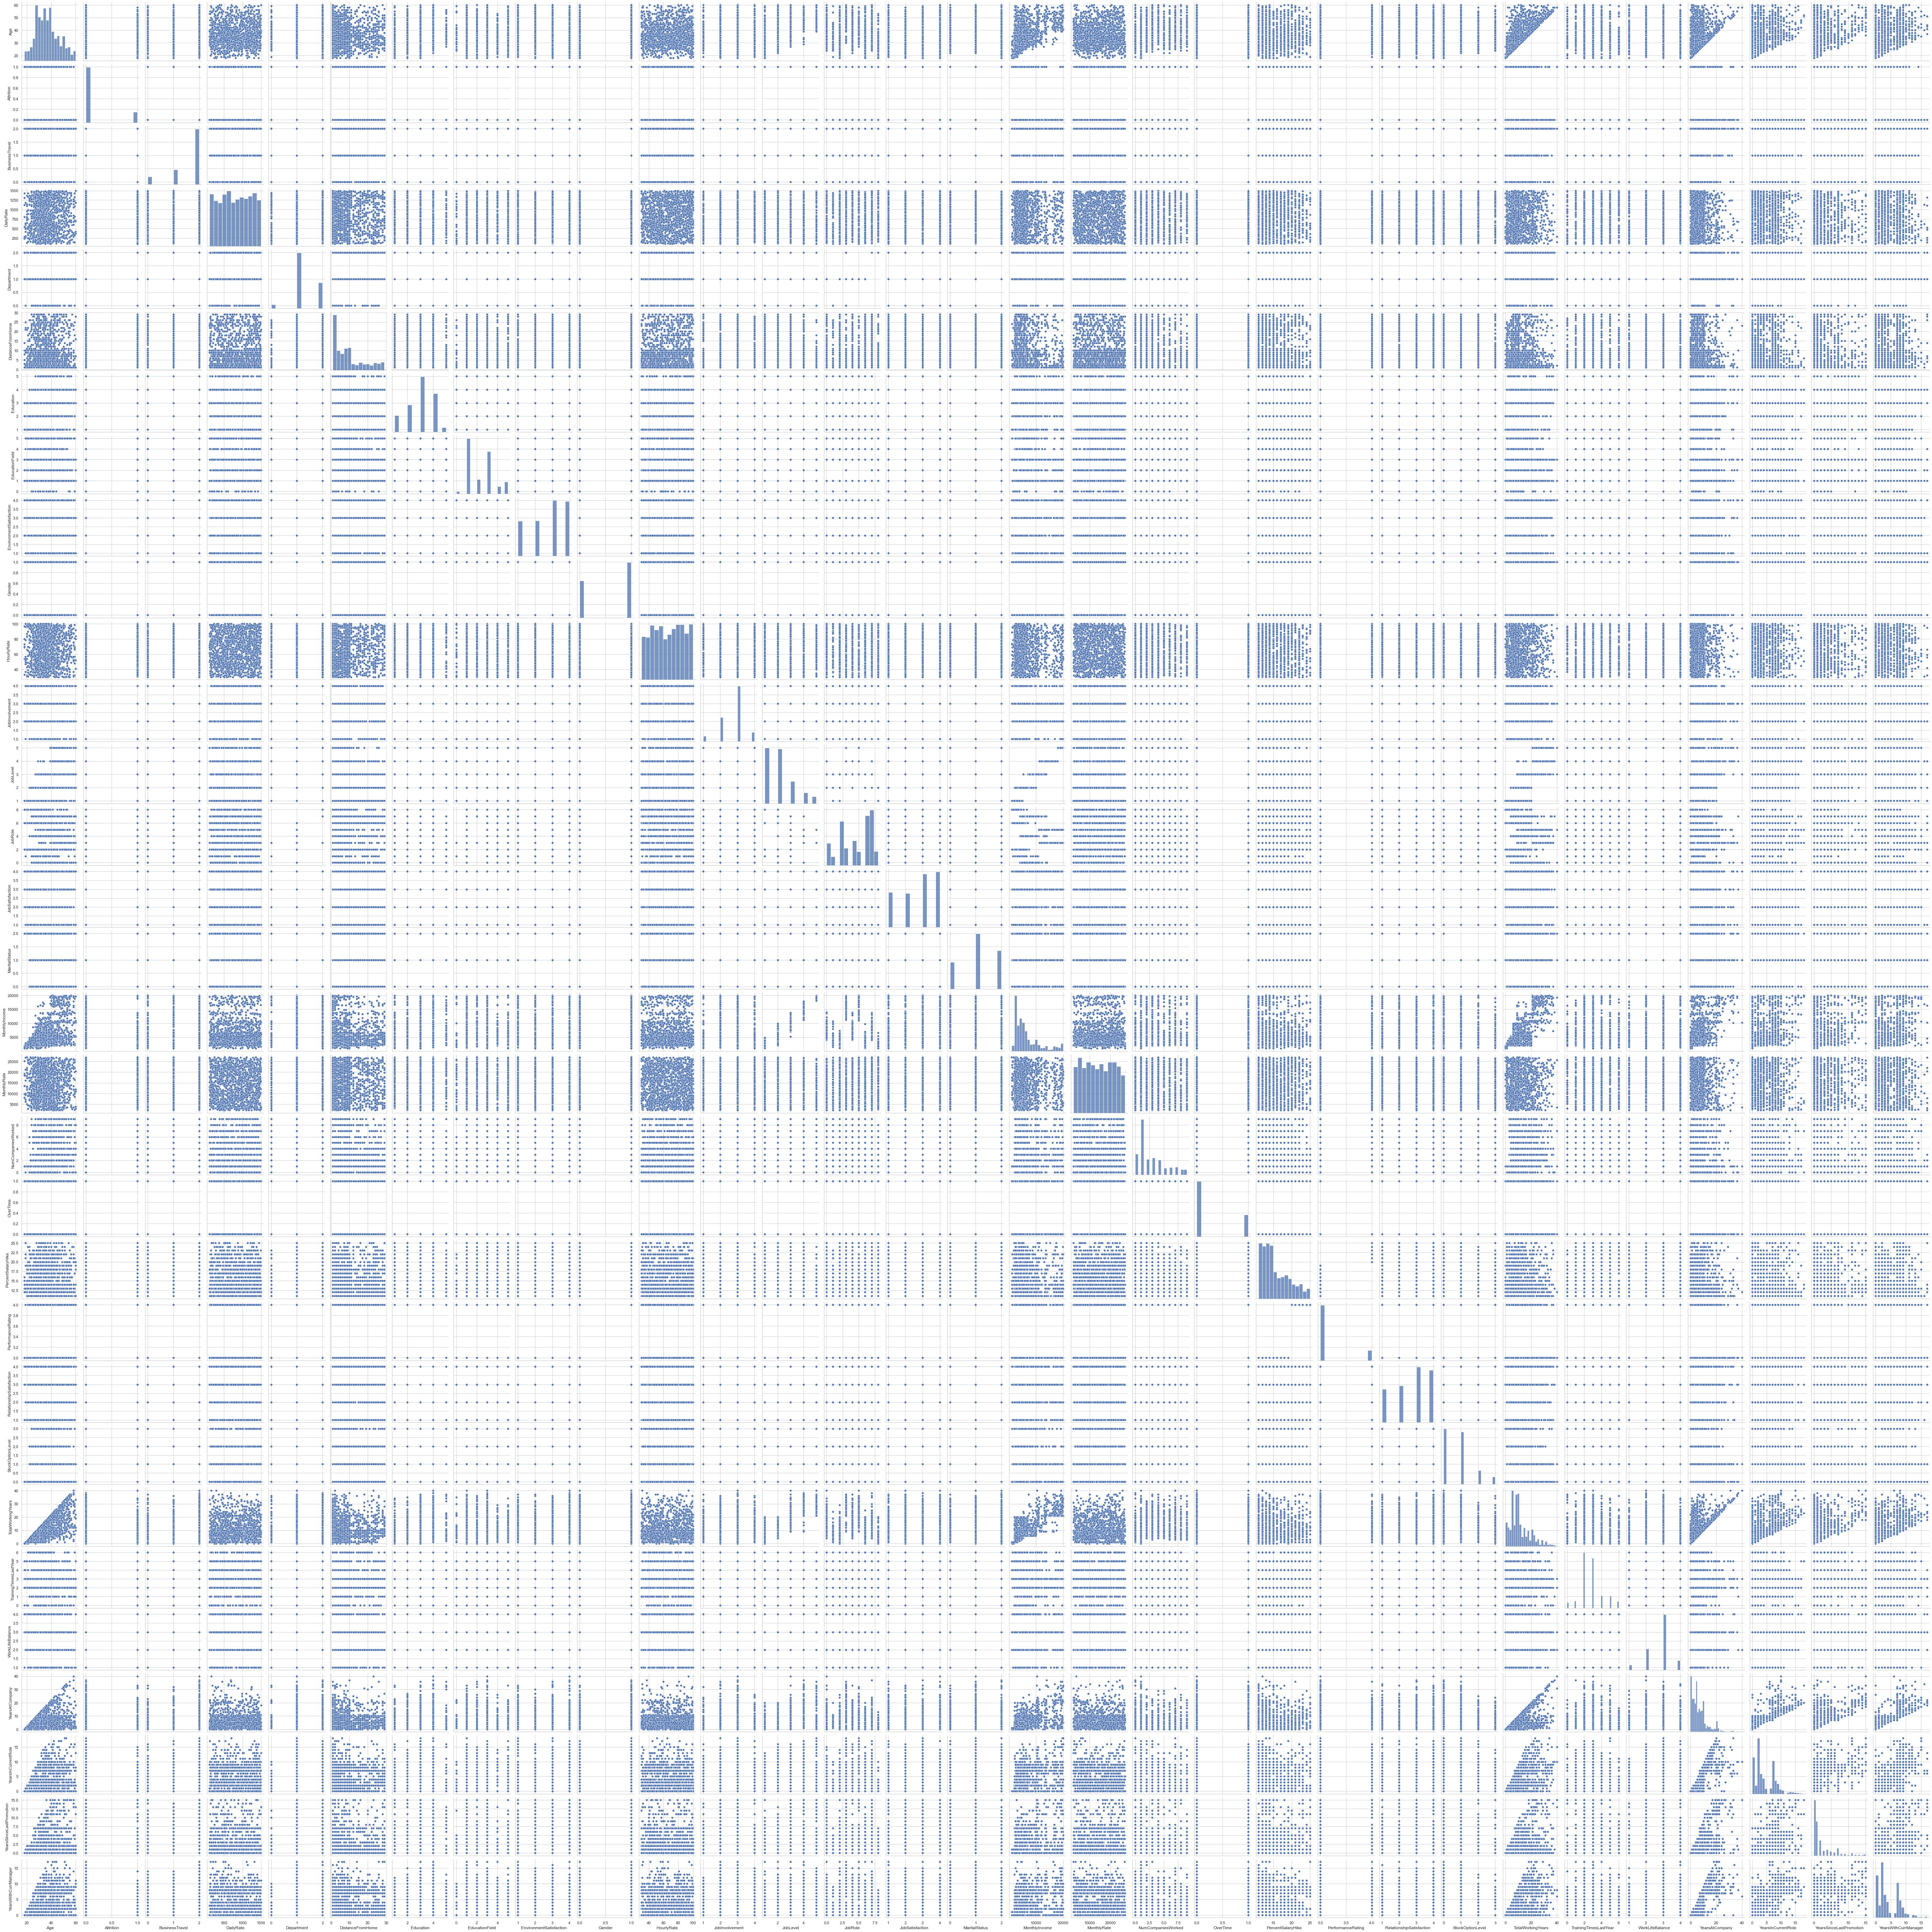

In [379]:
sns.pairplot(ds)

# EDA using Statistical approch 

In [380]:
#checking the correlations between columns
corr=ds.corr()
corr

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010661   
Attrition                -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel            0.024751   0.000074        1.000000  -0.004086   
DailyRate                 0.010661  -0.056652       -0.004086   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004985   
Education                 0.208034  -0.031373        0.000757  -0.016806   
EducationField           -0.040873   0.026846        0.023724   0.037709   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018355   
Gender                   -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate                0.024287  -0.006846        0.026528   0.023381   
JobInvolvement            0.029820  -0.130016        0.039062   0.046135   
JobLevel                  0.509604  -0.169105        0.019311   0.002966   
JobRole                  -0.122427   0.067151        0.002724  -0.009472   
JobSatisfaction          -0.004892  -0.103481       -0.033962   0.030571   
MaritalStatus            -0.095029   0.162070        0.024001  -0.069586   
MonthlyIncome             0.497855  -0.159840        0.034319   0.007707   
MonthlyRate               0.028051   0.015170       -0.014107  -0.032182   
NumCompaniesWorked        0.299635   0.043494        0.020875   0.038153   
OverTime                  0.028062   0.246118        0.016543   0.009135   
PercentSalaryHike         0.003634  -0.013478       -0.029377   0.022704   
PerformanceRating         0.001904   0.002889       -0.026341   0.000473   
RelationshipSatisfaction  0.053535  -0.045872       -0.035986   0.007846   
StockOptionLevel          0.037510  -0.137145       -0.016727   0.042143   
TotalWorkingYears         0.680381  -0.171063        0.034226   0.014515   
TrainingTimesLastYear    -0.019621  -0.059478        0.015240   0.002453   
WorkLifeBalance          -0.021490  -0.063939       -0.011256  -0.037848   
YearsAtCompany            0.311309  -0.134392       -0.014575  -0.034055   
YearsInCurrentRole        0.212901  -0.160545       -0.011497   0.009932   
YearsSinceLastPromotion   0.216513  -0.033019       -0.032591  -0.033229   
YearsWithCurrManager      0.202089  -0.156199       -0.022636  -0.026363   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Attrition                   0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007109         -0.004985  -0.016806   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
Gender                     -0.041583         -0.001851  -0.016547   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.014437   0.004053   
MonthlyIncome               0.053130         -0.017014   0.094961   
MonthlyRate                 0.023642          0.027473  -0.026084   
NumCompaniesWorked         -0.035882         -0.029251   0.126317   
OverTime                    0.007481          0.025514  -0.020322   
PercentSalaryHike          -0.007840          0.040235  -0.011111   
PerformanceRating          -0.024604          0.027110  -0.024539   
Relationshi

<AxesSubplot:>

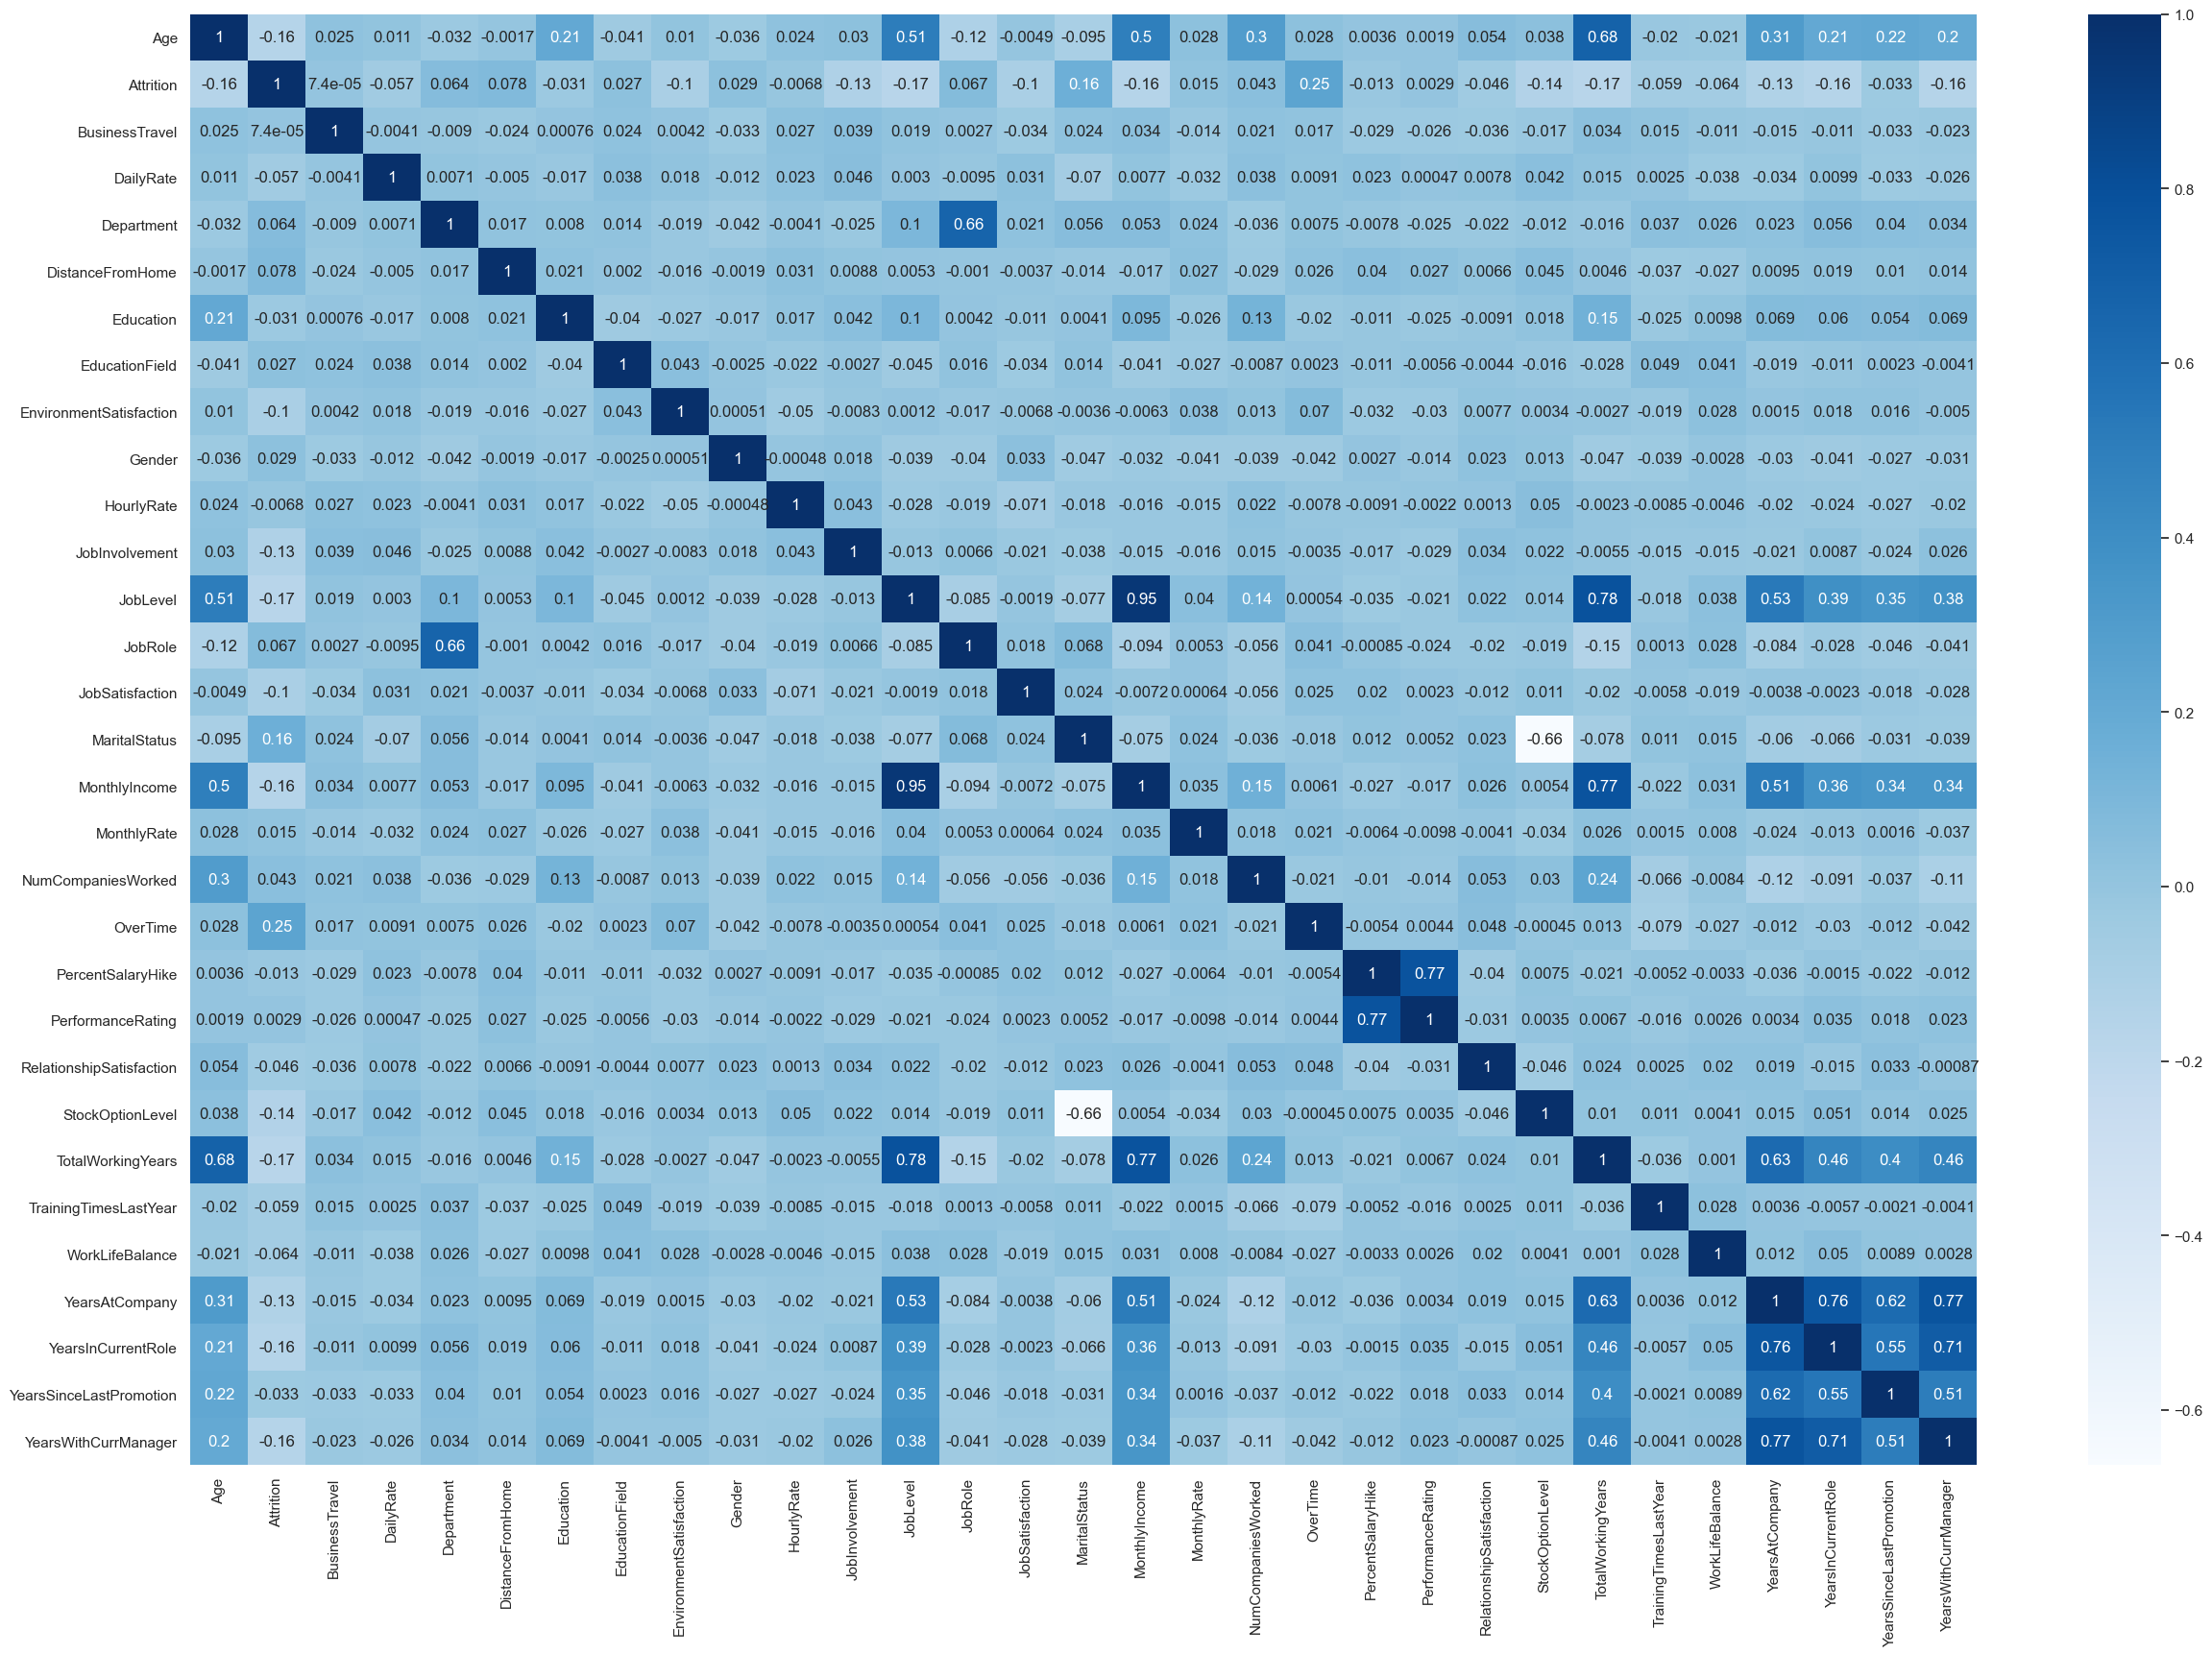

In [381]:
#example of multivariate 
#lets check the correlation matrix
#method ("pearson")

fig=plt.figure(figsize=(30,20),dpi=100)
hc=ds.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Blues")

Observation: 
    There is good correlation between performance rating and present salary hike.
       

In [382]:
corr_matrix=ds.corr()
corr_matrix['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

There is not good correlation between Attrition and any of the given parameter.

# Data Cleaning and outlier Handling

Age                            AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Attrition                   AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
BusinessTravel              AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
DailyRate                   AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Department                  AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
DistanceFromHome            AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
Education                   AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
EducationField                 AxesSubplot(0.125,0.593621;0.0945122x0.130172)
EnvironmentSatisfaction     AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
Gender                      AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
HourlyRate                  AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
JobInvolvement              AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
JobLevel                    AxesSubplot(0.692073,0.593621;0.0945

<Figure size 3000x2000 with 0 Axes>

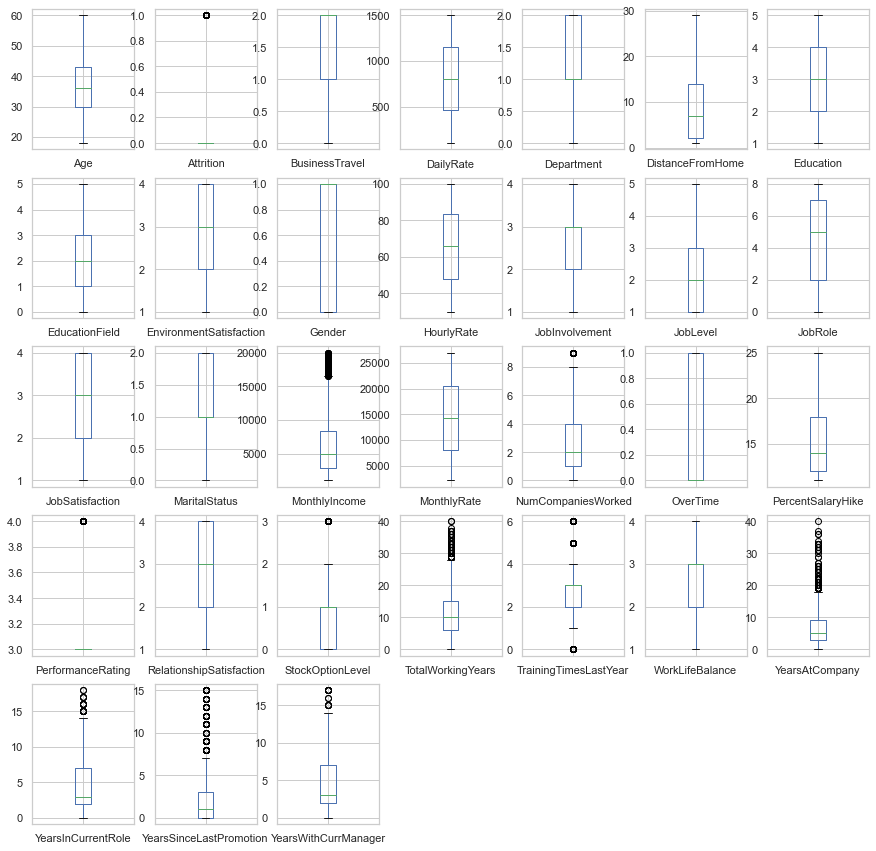

In [383]:
fig=plt.figure(figsize=(30,20),dpi=100)
ds.plot(kind="box",subplots=True,layout=(5,7),figsize=(15,15))

We can see few parameters having outliers

# outliers removal using IQR method

In [384]:
#we checked that thers is outliers, so we can use IQR to remove outliers
def removeOutlier(col):
    sorted(col)
    qua1,qua2 = col.quantile([0.25,0.75])
#IQR calculate 25 to 75% of data
    IQR= qua2 - qua1
    lowerRange = qua1 - (1.5*IQR)
    upperRange= qua2+(1.5*IQR)
    return lowerRange, upperRange

In [385]:
columns1=["MonthlyIncome", "NumCompaniesWorked", "PerformanceRating", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany","YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
for i in ds[columns1]:
    lowScore, highScore= removeOutlier(ds[i])
    ds[i]=np.where(ds[i]>highScore,highScore,ds[i])
    ds[i]=np.where(ds[i]<lowScore,lowScore,ds[i])

Age                            AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Attrition                   AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
BusinessTravel              AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
DailyRate                   AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Department                  AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
DistanceFromHome            AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
Education                   AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
EducationField                 AxesSubplot(0.125,0.593621;0.0945122x0.130172)
EnvironmentSatisfaction     AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
Gender                      AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
HourlyRate                  AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
JobInvolvement              AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
JobLevel                    AxesSubplot(0.692073,0.593621;0.0945

<Figure size 3000x2000 with 0 Axes>

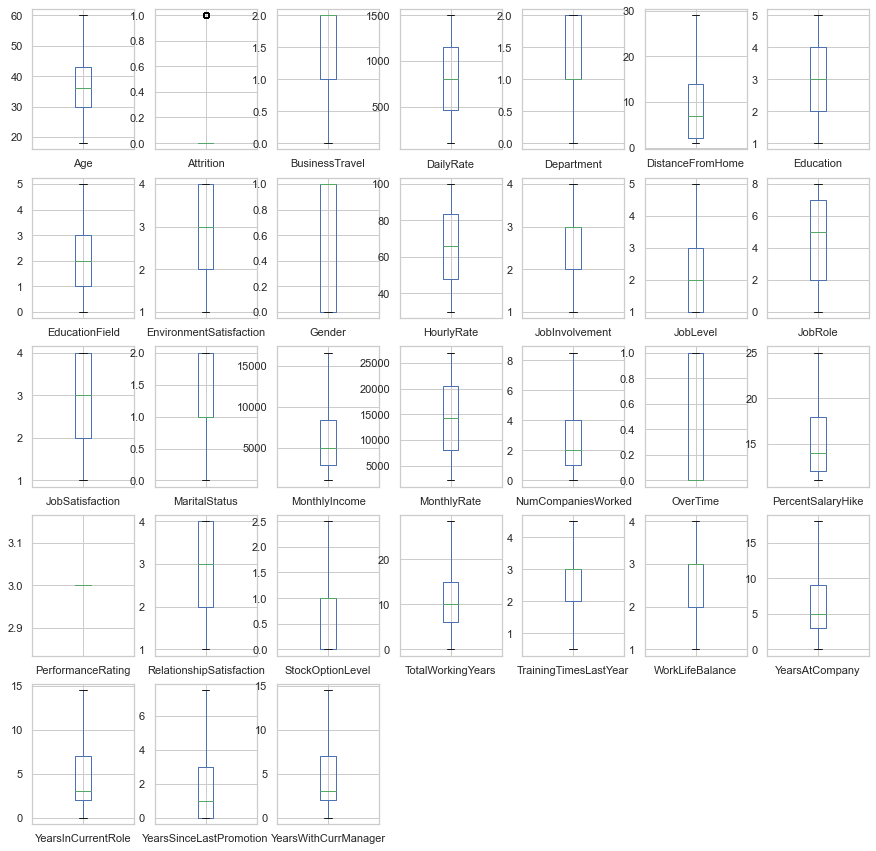

In [386]:
fig=plt.figure(figsize=(30,20),dpi=100)
ds.plot(kind="box",subplots=True,layout=(5,7),figsize=(15,15))

outliers removed from the inputs of dataset

In [387]:
#checking the skewness in dataset
ds.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.168595
MonthlyRate                 0.018578
NumCompaniesWorked          0.971516
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.664714
TotalWorkingYears           0.855518
TrainingTimesLastYear       0.117931
WorkLifeBalance            -0.552480
Y

observations: most of parameters having positive skewness available


In [388]:
#to resolve the skewness, lets divide the new dataset into input and output datasets
ds_x=ds.drop(columns=["Attrition"])
y=ds[["Attrition"]]

In [389]:
ds_x.shape

(1470, 30)

In [390]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Attrition  1470 non-null   int32
dtypes: int32(1)
memory usage: 5.9 KB


In [391]:
ds_x.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [392]:
ds_x.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.168595
MonthlyRate                 0.018578
NumCompaniesWorked          0.971516
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.664714
TotalWorkingYears           0.855518
TrainingTimesLastYear       0.117931
WorkLifeBalance            -0.552480
YearsAtCompany              0.900774
Y

In [393]:
#tried to remove outlier (sqrt then cbrt) but didnt get good result so now resolve skewness using power transform.

ds_new=power_transform(ds_x)
ds_new=pd.DataFrame(ds_new,columns=ds_x.columns)

In [394]:
ds_new.skew()

Age                        -0.007603
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          0.012558
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           0.000000
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.060268
TotalWorkingYears          -0.027114
TrainingTimesLastYear      -0.026281
WorkLifeBalance            -0.012286
YearsAtCompany             -0.040850
Y

Observations: Still daily_decr30, daily_decr90, medianamnt_ma_rech30 having skewness..(values are greater or smaller than 0.5)

In [395]:
#to resolve skewness
columns2=["BusinessTravel","OverTime"]

for i in columns2:
    ds_new[i]=np.cbrt(ds_new[i])


In [396]:
ds_new.skew()

Age                        -0.007603
BusinessTravel             -0.927188
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          0.012558
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           0.000000
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.060268
TotalWorkingYears          -0.027114
TrainingTimesLastYear      -0.026281
WorkLifeBalance            -0.012286
YearsAtCompany             -0.040850
Y

Observations: skewness resolved

In [397]:
x=ds_new

# Feature Engineering

In [398]:
#checking lable parameter (as output) frequency using countplot again

<AxesSubplot:xlabel='Attrition', ylabel='count'>

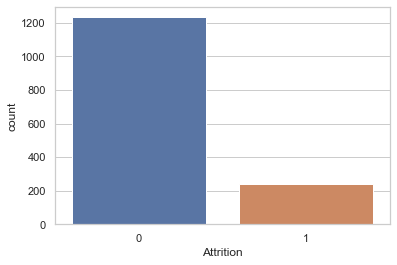

In [399]:
sns.countplot(x=ds["Attrition"])

Observations: There is label imbalance in between yes Attrition and No Attrition.. (very lass yes attrition as compair to no Attrition).. 
so to get better model we have to balance it by over sampling in minority class or under sampling in majority class 

because there is minority class (1--> yes attrition) is very less so we can use oversampling the minority class

Handling class imbalance problem by oversampling the minority class :-

In [400]:
from imblearn.over_sampling import SMOTE
SM = SMOTE ()

x_over,y_over=SM.fit_resample(x,y)

In [401]:
y_over

Attrition
0             1
1             0
2             1
3             0
4             0
...         ...
2461          1
2462          1
2463          1
2464          1
2465          1

[2466 rows x 1 columns]

Observation: all parameters are now in same range (or common scale)

In [402]:
#installed the imbalance library for over samping

#!pip install imbalanced-learn

In [403]:
x_over

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0     0.522140        0.859735   0.759289    1.377454         -1.494085   
1     1.276411       -1.116785  -1.334597   -0.472127          0.243416   
2     0.102091        0.859735   1.340365   -0.472127         -1.031215   
3    -0.353971       -1.116785   1.379936   -0.472127         -0.700347   
4    -1.123755        0.859735  -0.453941   -0.472127         -1.031215   
...        ...             ...        ...         ...               ...   
2461 -0.636786       -1.183946   0.384377   -0.472127          0.517603   
2462 -0.147176       -1.116785  -1.761814   -0.472127          1.245045   
2463 -0.770929        0.859735  -0.232122    0.307756         -1.031215   
2464  0.728460        0.859735  -0.642071    1.377454          1.447057   
2465 -1.520396       -0.256584   1.262256   -1.645513          0.974610   

      Education  EducationField  EnvironmentSatisfaction    Gender  \
0     -0.916940       -0.960488                -0.706596 -1.224745   
1     -1.771185       -0.960488                 0.208597  0.816497   
2     -0.916940        1.247620                 1.209516  0.816497   
3      1.082871       -0.960488                 1.209516 -1.224745   
4     -1.771185        0.697390                -1.518118  0.816497   
...         ...             ...                      ...       ...   
2461   0.303668        1.311363                 0.819519  0.021150   
2462   1.082871       -0.960488                 1.209516 -0.760881   
2463   1.082871        0.403331                 0.208597  0.816497   
2464  -0.604162       -0.000004                 0.535571  0.816497   
2465   0.040522       -1.854550                -0.766634 -1.224745   

      HourlyRate  ...  PerformanceRating  RelationshipSatisfaction  \
0       1.354630  ...                0.0                 -1.529513   
1      -0.210675  ...                0.0                  1.229016   
2       1.263094  ...                0.0                 -0.700130   
3      -0.460197  ...                0.0                  0.225164   
4      -1.289301  ...                0.0                  1.229016   
...          ...  ...                ...                       ...   
2461    0.993945  ...                0.0                 -1.023290   
2462    1.414694  ...                0.0                 -1.130769   
2463   -0.225141  ...                0.0                  0.805738   
2464   -0.349576  ...                0.0                 -1.258575   
2465   -0.858492  ...                0.0                 -1.529513   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            -1.091366          -0.256809              -2.262561   
1             0.552154           0.047440               0.303818   
2            -1.091366          -0.425680               0.303818   
3            -1.091366          -0.256809               0.303818   
4             0.552154          -0.608891               0.303818   
...                ...                ...                    ...   
2461          0.552154          -0.594462              -0.666092   
2462          0.552154           0.078962               0.303818   
2463         -1.091366          -0.647956               0.303818   
2464          1.108249           0.214784               1.225112   
2465         -1.091366          -1.968025               0.351508   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0           -2.144446        0.127480            0.203540   
1            0.276821        0.821175            0.890293   
2            0.276821       -2.127120           -1.593299   
3            0.276821        0.503818            0.890293   
4            0.276821       -0.985319           -0.451816   
...               ...             ...                 ...   
2461         0.276821        0.139973            0.071122   
2462        -1.108624        0.708328           -0.556458   
2463        -1.108624       -0.985319           -0.451816   
2

Observation: after oversampling number of rows increased-- 2466

# Model Building (Train test split)

In [404]:
x=x_over
y=y_over

In [405]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1923, 30)
(543, 30)
(1923, 1)
(543, 1)


observations: test size in 22% and random state is 45.
    
    1923 rows as train case
    543 rows as test case 

# Build and Evaluate the models

In [406]:
#using Logistic Regression--> there are only 2 values of y. so we can not use learn Rigression here...

lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.7790055248618785
[[217  68]
 [ 52 206]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       285
           1       0.75      0.80      0.77       258

    accuracy                           0.78       543
   macro avg       0.78      0.78      0.78       543
weighted avg       0.78      0.78      0.78       543



In [407]:
#using GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy score:
0.714548802946593
[[204  81]
 [ 74 184]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       285
           1       0.69      0.71      0.70       258

    accuracy                           0.71       543
   macro avg       0.71      0.71      0.71       543
weighted avg       0.72      0.71      0.71       543



In [408]:
#Using Linear SVC
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(x_train, y_train.values.ravel())
pred=clf.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.7790055248618785
[[216  69]
 [ 51 207]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       285
           1       0.75      0.80      0.78       258

    accuracy                           0.78       543
   macro avg       0.78      0.78      0.78       543
weighted avg       0.78      0.78      0.78       543



In [409]:
#using decision tree classifier
dtc=DecisionTreeClassifier()  #---> criterion-->gini as default
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8416206261510129
[[232  53]
 [ 33 225]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       285
           1       0.81      0.87      0.84       258

    accuracy                           0.84       543
   macro avg       0.84      0.84      0.84       543
weighted avg       0.84      0.84      0.84       543



In [410]:
#using Kneighors classifier
#k=5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.7679558011049724
[[161 124]
 [  2 256]]
              precision    recall  f1-score   support

           0       0.99      0.56      0.72       285
           1       0.67      0.99      0.80       258

    accuracy                           0.77       543
   macro avg       0.83      0.78      0.76       543
weighted avg       0.84      0.77      0.76       543



# Ensemble Techniques ----Classifier

In [411]:
#using random forest classifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.9484346224677717
[[277   8]
 [ 20 238]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       285
           1       0.97      0.92      0.94       258

    accuracy                           0.95       543
   macro avg       0.95      0.95      0.95       543
weighted avg       0.95      0.95      0.95       543



In [412]:
#using Ada boost classifier 
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.9042357274401474
[[255  30]
 [ 22 236]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       285
           1       0.89      0.91      0.90       258

    accuracy                           0.90       543
   macro avg       0.90      0.90      0.90       543
weighted avg       0.90      0.90      0.90       543



In [413]:
#using Gradient Boosting Classifier
gbc=GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.9263351749539595
[[270  15]
 [ 25 233]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       285
           1       0.94      0.90      0.92       258

    accuracy                           0.93       543
   macro avg       0.93      0.93      0.93       543
weighted avg       0.93      0.93      0.93       543



Observation: we can see randomforest providing highest accuracy 

# Hyper Parameter tunning

In [414]:
#GridSearchCV for Decision tree classifier

grid_param = { "criterion": ["gini","entropy"]}

gd_sr =GridSearchCV(estimator= dtc, param_grid=grid_param,scoring="accuracy", cv=5) #defaut scoring ="accuracy"
gd_sr.fit(x_train,y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.852297077922078


# Evaluate the model again

In [415]:
dtc=DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8858195211786372
[[250  35]
 [ 27 231]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       285
           1       0.87      0.90      0.88       258

    accuracy                           0.89       543
   macro avg       0.89      0.89      0.89       543
weighted avg       0.89      0.89      0.89       543



observation: accuracy inproved from 0.8692449355432781 to 0.8970635608970388

In [416]:
#using n_estimator= 200 
rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.9558011049723757
[[278   7]
 [ 17 241]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       285
           1       0.97      0.93      0.95       258

    accuracy                           0.96       543
   macro avg       0.96      0.95      0.96       543
weighted avg       0.96      0.96      0.96       543



observation: Accuracy score inproved from 0.9484346224677717 to 0.9558011049723757

In [417]:
#Cross validation

#cross validation is taking too long time to run

score=cross_val_score(rf, x, y, cv=10)

print(score)

print(score.mean())

[0.7854251  0.77732794 0.97975709 0.98785425 0.9757085  0.98380567
 0.98373984 0.98780488 0.99186992 0.9796748 ]
0.943296797340443


Observations: afer doing cross validation we can see we are getting accuracy 0.94855 which is almost similar so the model performing well. 

# Saving Model

we are saving model here from rf because "RandomForestClassifier" given the best accuracy score of dataset

In [418]:
joblib.dump(rf,"HR_Analysis.obj")

rf_from_joblib=joblib.load("HR_Analysis.obj")